# <font color='blue'> LOAN PREDICTION

<img src='https://defisolutions.com/wp-content/uploads/selected-1-1.png'>

## <font color='blue'> Data Dictionary
- **Loan ID:** A unique Identifier for the loan information.
- **Customer ID:** A unique identifier for the customer. Customers may have more than one loan.
- **Loan Status:** A categorical variable indicating if the loan was paid back or defaulted.
- **Current Loan Amount:** This is the loan amount that was either completely paid off, or the amount that was defaulted.
- **Term:** A categorical variable indicating if it is a short term or long term loan.
- **Credit Score:** A value between 0 and 800 indicating the riskiness of the borrowers credit history.
- **Years in current job**: A categorical variable indicating how many years the customer has been in their current job.
- **Home Ownership:** Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
- **Annual Income:** The customer's annual income
- **Purpose:** A description of the purpose of the loan.
- **Monthly Debt:** The customer's monthly payment for their existing loans
- **Years of Credit History:** The years since the first entry in the customer’s credit history
- **Months since last delinquent:** Months since the last loan delinquent payment
- **Number of Open Accounts:** The total number of open credit cards
- **Number of Credit Problems:** The number of credit problems in the customer records.
- **Current Credit Balance:** The current total debt for the customer
- **Maximum Open Credit:** The maximum credit limit for all credit sources.
- **Bankruptcies:** The number of bankruptcies
- **Tax Liens:** The number of tax liens.

## <font color='blue'> Goals
1. **Business Objective**
    - A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.
    - The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.


2. **Data Understanding**
    - The dataset resembles a real-world dataset and has many of the same challenges. It has:
    - Missing values
    - Spelling differences
    - Punctuation format
    - Duplicates rows


3. **Data Preparation**
    - Split your data into training and testing
    - Start with Exploratory data analysis
    - Data cleaning
    - Handling the missing values
    - Transform categorical data into numeric
    - Feature Engineering (such as credit utilization)
    - The goal is to clean the dataset and get it ready for the Algorithms


3. **Modeling**
    - Algorithm Selection
    - Depending on the question at hand you can decide which algorithm
    to choose

4. **Classification Question**
    - Pick a classification algorithm
    - Regression based
    - Tree based
    - Distance based
    - Probability based
    - Model Evaluation
    - Evaluation criteria


5. **Modeling:**
    - Pick an algorithm
    - Train the algorithm using training data
    - Evaluate the trained model
    - Use the trained model to predict who is a good customer
    on test data
    - Come up with questions to ask the customer when they
    apply for a loan

## <font color='blue'> Import Requirements

In [6]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## <font color='blue'> Import Data

In [8]:
df=pd.read_csv('LoanPrediction/LoansTrainingSet.csv')

## <font color='blue'> EDA(Exploratory Data Analysis)

In [10]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [11]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
197005,c3dd6d72-7342-425d-aa7b-700e6485912a,d1b5b82c-9171-4f41-bbcc-f41a95134f48,Charged Off,19934,Short Term,NaN,8 years,Home Mortgage,NaN,Debt Consolidation,"$1,361.32",19.4,30.0,12,0,16483,19835,0.0,0.0
83835,533f9d58-8941-427a-9f8d-441ca670e623,027c2d52-ec49-4fd6-9121-de492829c9e3,Fully Paid,99999999,Short Term,745.0,4 years,Own Home,52947.0,Debt Consolidation,$712.14,16.5,NaN,7,0,22941,29678,0.0,0.0
18102,120da947-5e9d-420e-9c97-edffa67c5691,755c32f5-2a9c-4139-af96-1a92aac33c59,Fully Paid,5504,Short Term,720.0,< 1 year,Rent,49140.0,Debt Consolidation,$239.97,9.3,NaN,18,0,10125,12083,0.0,0.0
226189,e10d2a54-9cc3-46a8-916a-11657aa8fb05,21657039-2ce6-4a1c-abf1-068cd212f91a,Charged Off,35084,Long Term,722.0,< 1 year,Home Mortgage,200480.0,Debt Consolidation,"$1,921.27",22.1,NaN,8,0,51944,61545,0.0,0.0
201389,c85d2e26-7621-4ef9-9a73-2aebb1355b36,05ba6d15-df9a-4d28-ad14-c294a6502499,Charged Off,5881,Short Term,734.0,< 1 year,Rent,28423.0,Debt Consolidation,$802.95,14.6,NaN,9,0,19045,20883,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [13]:
df.shape

(256984, 19)

In [14]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,256984.0,1.371331e+07,3.438131e+07,505.0,8299.0,14298.0,24367.0,99999999.0
Credit Score,195308.0,1.251116e+03,1.762017e+03,585.0,714.0,733.0,744.0,7510.0
Annual Income,195308.0,7.195272e+04,5.887757e+04,0.0,44321.0,61242.0,86462.0,8713547.0
Years of Credit History,256984.0,1.829019e+01,7.075747e+00,3.4,13.5,17.0,21.7,70.5
Months since last delinquent,116601.0,3.488145e+01,2.185417e+01,0.0,16.0,32.0,51.0,176.0
Number of Open Accounts,256984.0,1.110627e+01,4.982982e+00,0.0,8.0,10.0,14.0,76.0
Number of Credit Problems,256984.0,1.566284e-01,4.607309e-01,0.0,0.0,0.0,0.0,11.0
Current Credit Balance,256984.0,1.540656e+04,1.966506e+04,0.0,5974.0,11078.0,19319.0,1731412.0
Bankruptcies,256455.0,1.103156e-01,3.362287e-01,0.0,0.0,0.0,0.0,7.0
Tax Liens,256961.0,2.720257e-02,2.459499e-01,0.0,0.0,0.0,0.0,11.0


In [16]:
df[df['Credit Score'].isnull()].sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
43988,2bc20dab-9292-48c5-9c4a-ae3bd1240d8f,119a9d2a-382f-44ad-a7f8-77bda200dab2,Fully Paid,35214,Short Term,NaN,10+ years,Own Home,NaN,Debt Consolidation,"$1,700.31",33.0,NaN,21,0,27746,34297,0.0,0.0
127144,7e7f0006-71e5-4e19-bd83-882daaead080,8d43fd12-d816-4622-948f-50c014e0d876,Charged Off,13126,Long Term,NaN,10+ years,Home Mortgage,NaN,Debt Consolidation,$872.99,30.0,13.0,16,0,3859,22305,0.0,0.0
65155,40c63a03-247a-41e3-8e0f-e22aa6991dd7,99b440d2-d866-4244-b40c-dd318edc445b,Fully Paid,6922,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$658.64,28.0,46.0,6,1,4617,9865,1.0,0.0
164836,a3fdf1db-e991-4293-976c-7d35564c0aec,74561f96-304a-492d-bc19-a6107d2afee9,Charged Off,10120,Long Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$990.92,21.8,28.0,10,0,3840,7694,0.0,0.0
236769,eb931967-e0ee-4a92-a59f-08b76be2a269,6b05510c-6158-41e5-aa83-f313d23c820f,Fully Paid,7154,Short Term,NaN,< 1 year,Rent,NaN,Debt Consolidation,$238.12,4.8,NaN,12,0,7243,13097,0.0,0.0


In [17]:
df[df['Years in current job'].isnull()].sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
102200,659a0f0d-ef64-4db4-a98e-4fd6936ef188,098256fb-43c1-4646-ae7d-4770662805f0,Fully Paid,99999999,Short Term,747.0,NaN,Home Mortgage,38579.0,Debt Consolidation,$376.14,16.4,34.0,7,0,714,29758,0.0,0.0
7420,07753ffd-141c-4579-b916-145f6f779624,c2ce3273-a370-497b-b7c0-4a2eb820df84,Fully Paid,99999999,Short Term,735.0,NaN,Own Home,35203.0,Debt Consolidation,$226.18,22.9,NaN,5,0,9248,12169,0.0,0.0
73651,492832c1-1b01-4f8e-8df0-f447b2b78cba,5b351e23-f3ca-4a7e-ba50-b2ae9b7071fc,Charged Off,19994,Long Term,738.0,NaN,Home Mortgage,47045.0,Debt Consolidation,$713.51,17.3,NaN,5,0,12270,235959,0.0,0.0
60981,3cac94ba-2aa4-450d-9328-35354f73aebe,4976b193-5e6c-4556-b560-b21e78c6a617,Fully Paid,11888,Long Term,734.0,NaN,Rent,51516.0,Debt Consolidation,$523.75,11.8,NaN,15,0,5725,40319,0.0,0.0
65207,40d226fd-cbf0-4e66-8cc2-b365eaf7957e,fb9e4439-7dfc-4abb-abac-c7f1bd0ab924,Fully Paid,2372,Short Term,730.0,NaN,Rent,11563.0,Debt Consolidation,$290.05,16.5,NaN,16,0,6859,47302,0.0,0.0


In [18]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [20]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

## <font color='blue'> Data Visualization

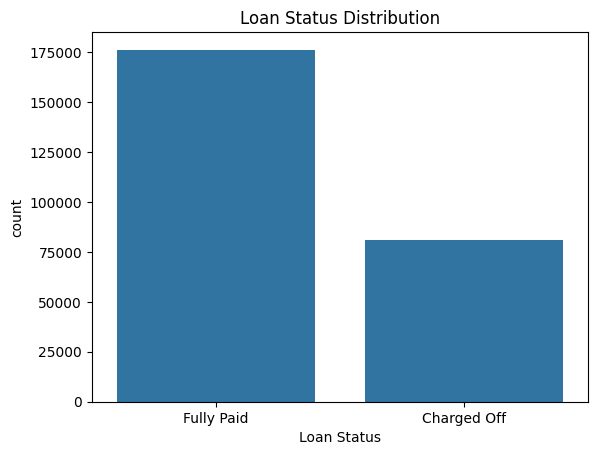

In [22]:
sns.countplot(x=df['Loan Status'])
plt.title('Loan Status Distribution');

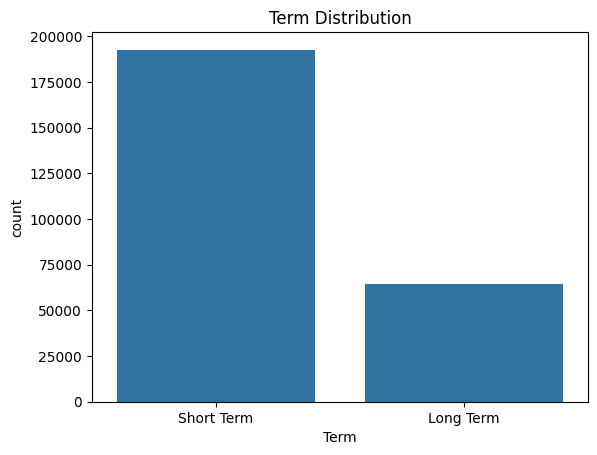

In [23]:
sns.countplot(x=df['Term'])
plt.title('Term Distribution');

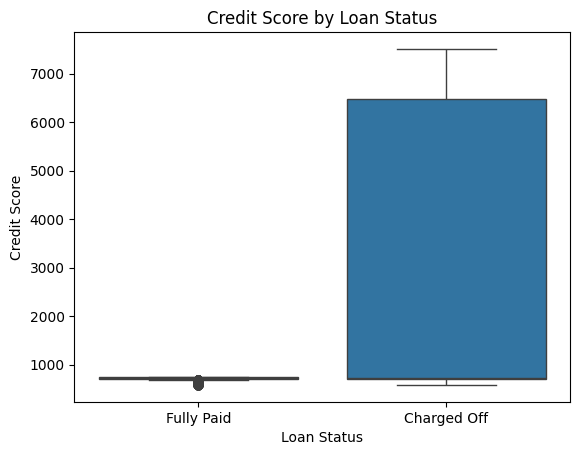

In [24]:
sns.boxplot(data=df, x='Loan Status', y='Credit Score')
plt.title('Credit Score by Loan Status');

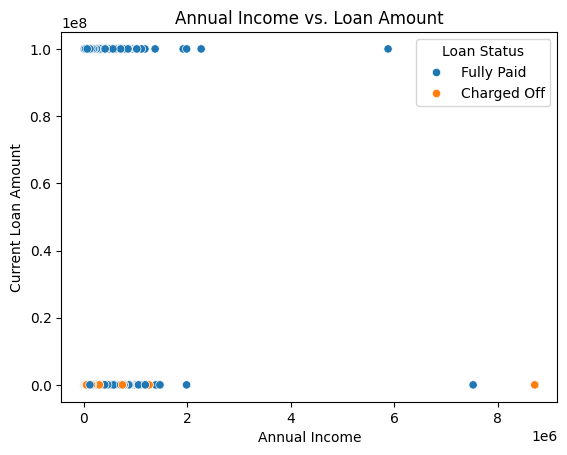

In [25]:
sns.scatterplot(data=df, x='Annual Income', y='Current Loan Amount', hue='Loan Status')
plt.title('Annual Income vs. Loan Amount');

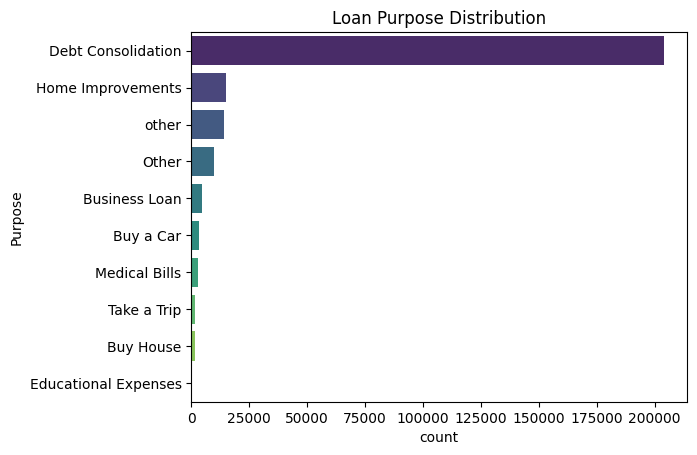

In [26]:
sns.countplot(data=df, y='Purpose', order=df['Purpose'].value_counts().index,palette='viridis')
plt.title('Loan Purpose Distribution');

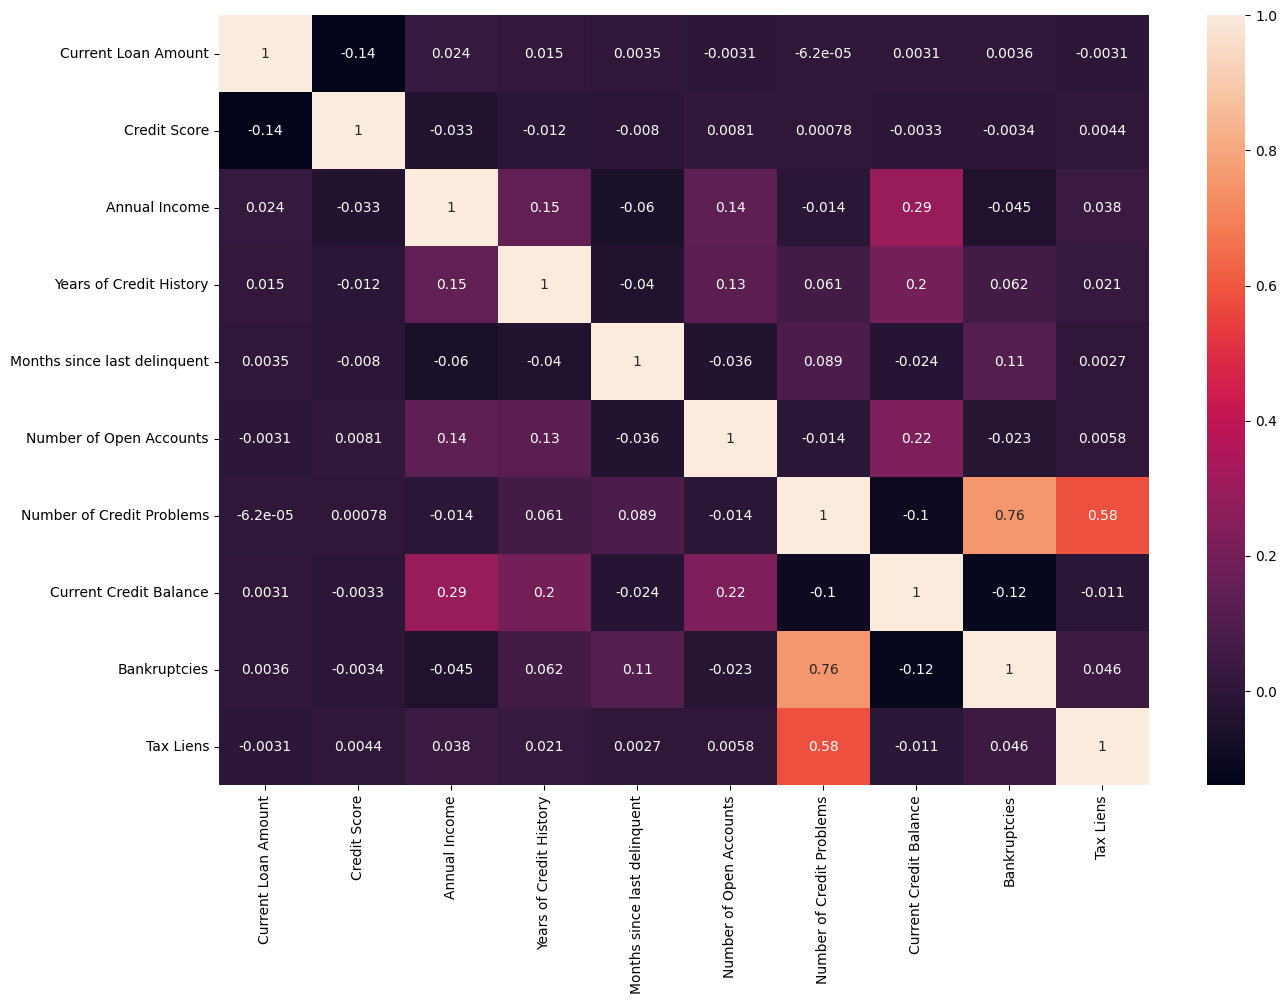

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True);

## <font color='blue'> Feature Engineering

In [29]:
df['Had_Delinquent']=np.where(df['Months since last delinquent'].notnull(),1,0)

In [30]:
df['Had_Delinquent'].unique()

array([1, 0])

### <font color='blue'> Handle Missing Values

In [32]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
Had_Delinquent                       0
dtype: int64

In [33]:
df[['Years in current job','Home Ownership']]

,Years in current job,Home Ownership
0,10+ years,Home Mortgage
1,4 years,Home Mortgage
2,10+ years,Home Mortgage
3,10+ years,Own Home
4,4 years,Rent
...,...,...
256979,2 years,Rent
256980,10+ years,Own Home
256981,9 years,Home Mortgage
256982,9 years,Home Mortgage


In [34]:
df['Credit Score'].fillna(df.groupby('Loan Status')['Credit Score'].transform('mean'),inplace=True)
df['Annual Income'] = df.groupby('Home Ownership')['Annual Income'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))
df['Years in current job'] = df.groupby('Home Ownership')['Years in current job'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))
df['Months since last delinquent'].fillna(0,inplace=True)
df['Bankruptcies'].fillna(0,inplace=True)
df['Tax Liens'].fillna(0,inplace=True)

In [35]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Had_Delinquent                  0
dtype: int64

In [36]:
df.drop(columns=['Loan ID','Customer ID'],inplace=True)

In [37]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Had_Delinquent
0,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,1
1,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,0.0,17,0,6262,19149,0.0,0.0,0
2,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,0.0,5,0,20967,28335,0.0,0.0,0
3,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,0.0,9,0,22529,43915,0.0,0.0,0
4,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,0.0,12,0,17391,37081,0.0,0.0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  object 
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  object 
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  object 
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  256984 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

In [39]:
df['Maximum Open Credit'].unique()

array([16056, 19149, 28335, ..., 55520, 37004, 62371], dtype=object)

In [40]:
df['Monthly Debt'] = df['Monthly Debt'].replace('[\$,]', '', regex=True).astype(float)

# Remove potential leading/trailing spaces and ensure all are valid
df['Maximum Open Credit'] = df['Maximum Open Credit'].str.strip().replace({'#VALUE!': np.nan})

# Convert column to float
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce')
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median(), inplace=True)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  object 
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  object 
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  float64
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  256984 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

## <font color='blue'> Modelling

In [43]:
x=df.drop(columns=['Loan Status'])
y=df[['Loan Status']]

In [44]:
x=pd.get_dummies(x,drop_first=True)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def classification_test(x,y,confusion_mtr=False,classification_rpt=False):
    g=GaussianNB()
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    k=KNeighborsClassifier()
    
    algos=[g,b,l,d,rf,h,k]
    algo_names=['Gaussian NB','Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','KNeighbors Classifier']

    accuracy=[]
    confusion=[]
    classification=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    result=pd.DataFrame(columns=['Accuracy Score','Confusion Matrix','Classification Report'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test,p))
        confusion.append(confusion_matrix(y_test,p)**0.5)
        classification.append(classification_report(y_test,p))

    result['Accuracy Score']=accuracy
    result['Confusion Matrix']=confusion
    result['Classification Report']=classification

    r_table=result.sort_values('Accuracy Score',ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
                confusion_mat = np.array(row['Confusion Matrix'])
                print(f"Confusion Matrix of {index}")
                plt.figure(figsize=(5,4))
                sns.heatmap(confusion_mat,annot=True)
                plt.show()
    if classification_rpt:
        for index, row in r_table.iterrows():
                print(f"Classification Report of {index}:")
                print(row['Classification Report'])

        
    return r_table[['Accuracy Score']]
    

Confusion Matrix of Random Forest Classifier


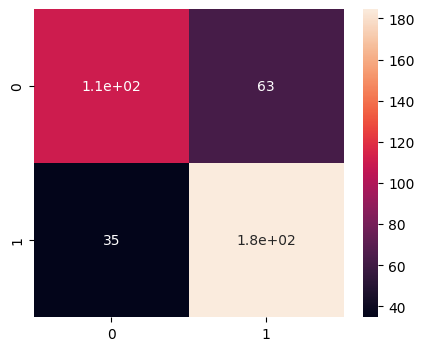

Confusion Matrix of Decision Tree Classifier


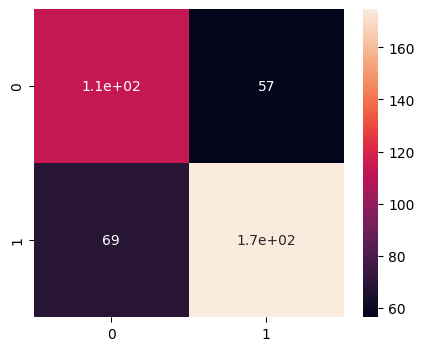

Confusion Matrix of Gradient Boosting Classifier


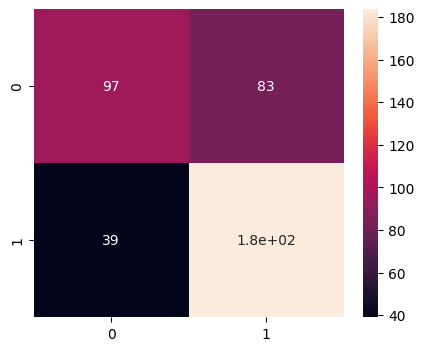

Confusion Matrix of Logistic Regression


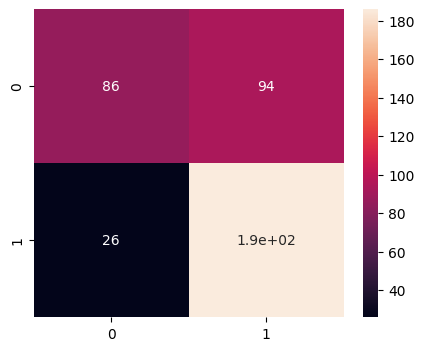

Confusion Matrix of KNeighbors Classifier


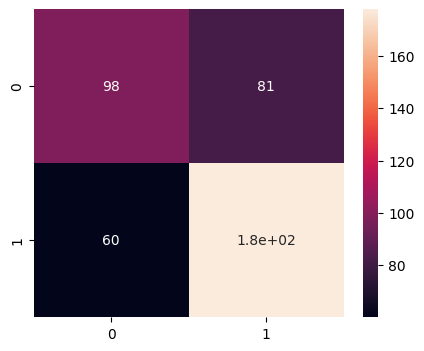

Confusion Matrix of Bernoulli NB


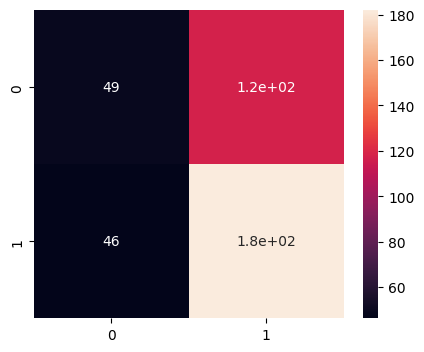

Confusion Matrix of Gaussian NB


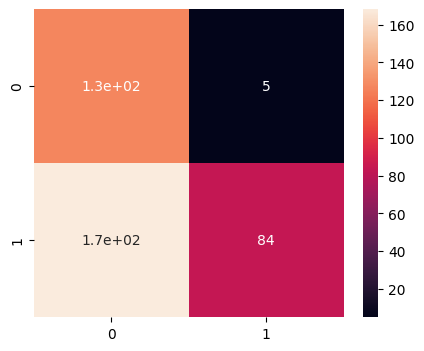

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

 Charged Off       0.91      0.76      0.83     16161
  Fully Paid       0.90      0.97      0.93     35236

    accuracy                           0.90     51397
   macro avg       0.90      0.86      0.88     51397
weighted avg       0.90      0.90      0.90     51397

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

 Charged Off       0.73      0.80      0.77     16161
  Fully Paid       0.91      0.87      0.88     35236

    accuracy                           0.85     51397
   macro avg       0.82      0.83      0.83     51397
weighted avg       0.85      0.85      0.85     51397

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

 Charged Off       0.86      0.58      0.69     16161
  Fully Paid       0.83      0.96      0.89     35236

    accuracy             

,Accuracy Score
Random Forest Classifier,0.900403
Decision Tree Classifier,0.845341
Gradient Boosting Classifier,0.837422
Logistic Regression,0.815515
KNeighbors Classifier,0.801506
Bernoulli NB,0.690721
Gaussian NB,0.449832


In [50]:
classification_test(x,y,confusion_mtr=True,classification_rpt=True)

Above table shows the accuracy of different classifiers on a dataset:

- **Random Forest (90.04%)** – Highest accuracy, leveraging multiple decision trees to improve predictions.
- **Decision Tree (84.53%)** – Performs well but can overfit without ensemble methods like Random Forest.
- **Gradient Boosting (83.74%)** – Also strong, sequentially improves accuracy but trains slower.
- **Logistic Regression (81.55%)** – Decent baseline, but limited in capturing complex patterns.
- **KNeighbors (80.15%)** – Relies on proximity; good but less robust than other models.
- **Bernoulli NB (69.07%)** – Moderate accuracy; works better with binary/boolean data.
- **Gaussian NB (44.98%)** – Lowest accuracy, likely due to data not fitting Gaussian assumptions.
  
**Random Forest leads, followed by Decision Tree and Gradient Boosting as top performers.**

## <font color='blue'> Picking the Best Algorithm

In [61]:
rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier()

## <font color='blue'> Feature Importance

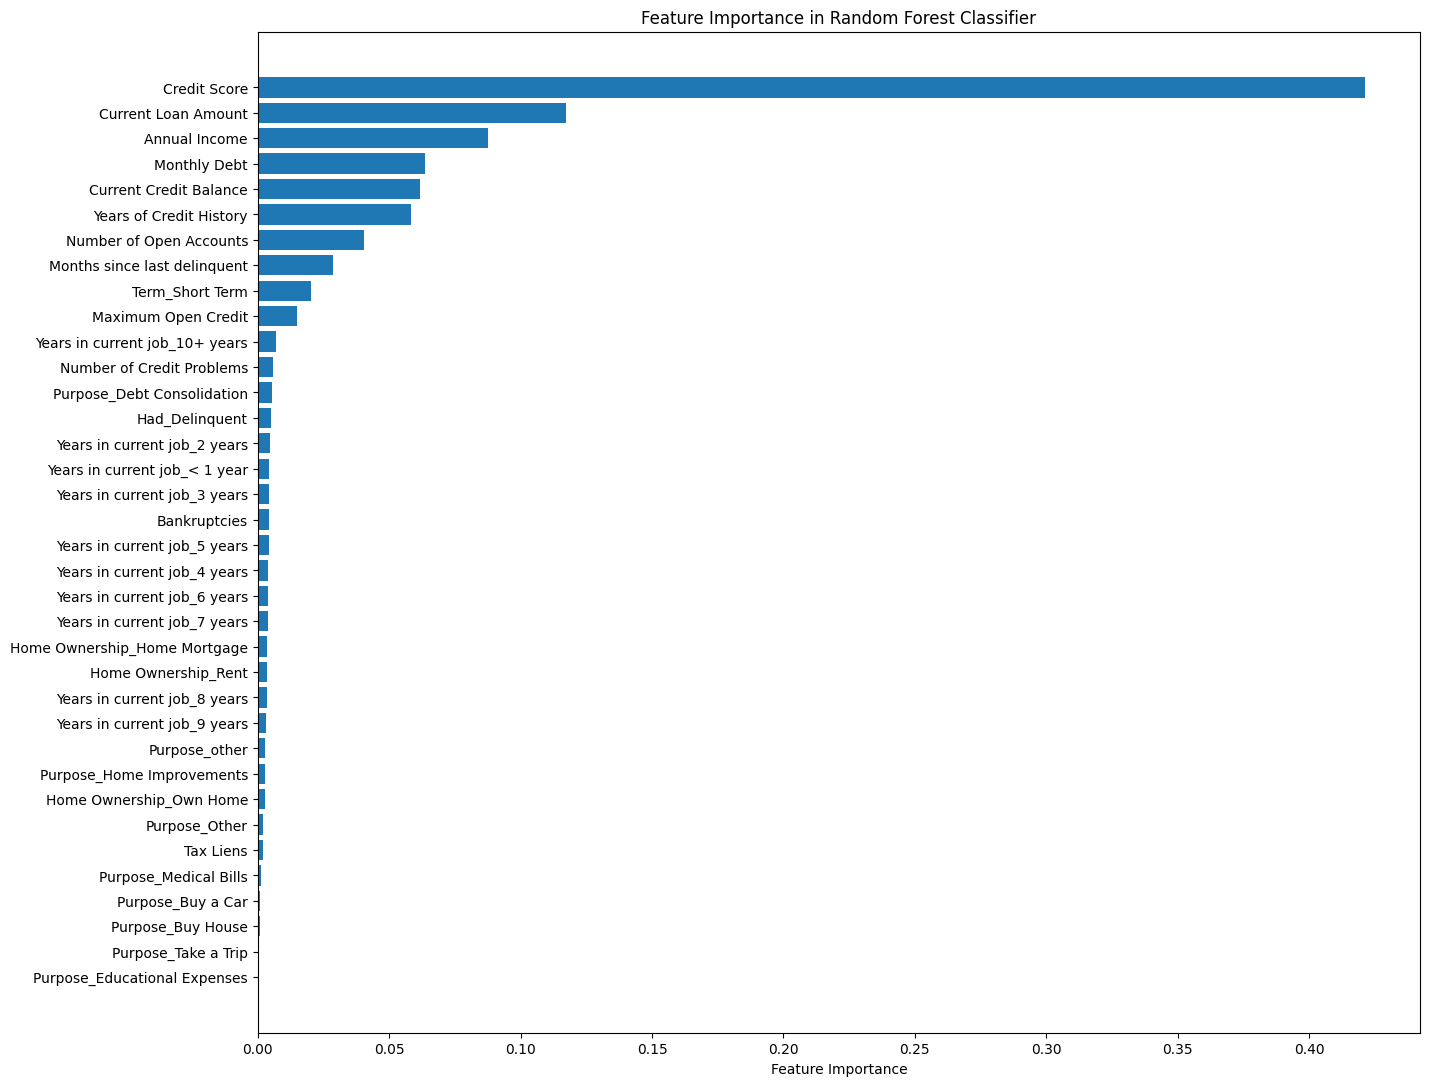

In [63]:
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 13))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Classifier");


## <font color='blue'> Key Questions for Loan Approval Based on Feature Importance

Based on the feature importance shown in the bar chart, we can prioritize questions for the customer that focus on the most influential factors for loan approval. Here’s an interpretation that suggests questions aligned with the top features:

- **Credit Score** - Since credit score is the most significant feature:
    - “What is your current credit score?”
    - “Have you checked your credit report recently for any discrepancies?”
      
- **Current Loan Amount :**
    - “What is the total amount of the loan you are requesting?”
    - “Do you currently have any outstanding loans?”
      
- **Annual Income:**
    - “What is your annual income?”
    - “Are there any additional sources of income?”
      
- **Monthly Debt :**
    - “What is your total monthly debt from all sources (e.g., credit cards, other loans)?”
      
- **Current Credit Balance :**
    - “What is your current balance on credit accounts?”
      
- **Years of Credit History :**
    - “How many years have you had credit?”
      
- **Number of Open Accounts :**
    - “How many credit accounts do you currently have open?”
      
- **Months Since Last Delinquent :**
    - “When was the last time you missed a payment or had a delinquency?”
